In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
path1 = r"F:\surface\surface_crack"
cate = ['Negative','Positive']


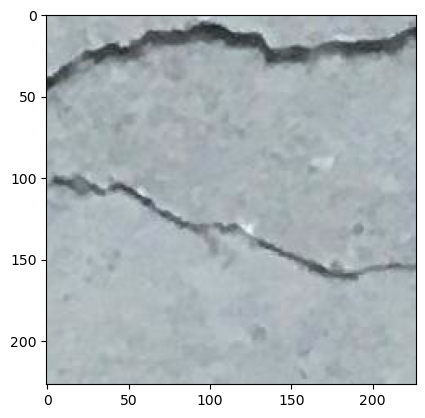

In [3]:
for i in cate:
    folders = os.path.join(path1 , i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_path = cv2.imread(image_path)
        plt.imshow(image_path)
        break

In [4]:
image_size = 200
input_image = []
for i in cate:
    folders = os.path.join(path1 , i)
    label = cate.index(i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size,image_size))
        input_image.append([image_array,label])

In [5]:
len(input_image)

3215

In [7]:
np.random.shuffle(input_image)

In [8]:
train = input_image[0:2572]
test =input_image[2572::]

In [9]:
train_X = []
train_Y = []

for x_values,y_values in train:
    train_X.append(x_values)
    train_Y.append(y_values)

In [10]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [11]:
train_X=train_X/255

In [12]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [28]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 32 ,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32 ,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32 ,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [29]:
model.compile(optimizer  = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [30]:
model.fit(train_X,train_Y,epochs = 5)

Epoch 1/5
81/81 [==============================] - 133s 2s/step - loss: 0.5229 - accuracy: 0.7278
Epoch 2/5
81/81 [==============================] - 130s 2s/step - loss: 0.2606 - accuracy: 0.9098
Epoch 3/5
81/81 [==============================] - 129s 2s/step - loss: 0.1399 - accuracy: 0.9576
Epoch 4/5
81/81 [==============================] - 146s 2s/step - loss: 0.0969 - accuracy: 0.9728
Epoch 5/5
81/81 [==============================] - 141s 2s/step - loss: 0.7510 - accuracy: 0.7286


In [31]:
test_x = []
test_y = []

for x_value,y_value in test:
    test_x.append(x_value)
    test_y.append(y_value)

In [32]:
test_x = np.array(test_x)
test_y = np.array(test_y)

In [33]:
test_x = test_x/255

In [34]:
pred = model.predict(test_x)

21/21 [==============================] - 9s 421ms/step


In [35]:
pred_class = np.argmax(pred , axis =1)
pred_class

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score

In [37]:
confusion_matrix(test_y,pred_class)

array([[283,  21],
       [ 23, 316]], dtype=int64)

In [38]:
accuracy_score(test_y,pred_class)

0.9315707620528771

In [39]:
recall_score(test_y,pred_class)

0.9321533923303835

In [40]:
model.save('surface_crack.h5')

In [ ]:
br_pr = load_model('model.h5')